In [4]:
#configuración en google colab de spark y pyspark
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
path_in="gdrive/MyDrive/st1800-231/datasets/trabajo2/"
path_out="gdrive/MyDrive/st1800-231/"
filename='twitterClimateData.csv.zip'

In [6]:
!git clone 'https://github.com/st1800eafit/st1800-231.git'

Cloning into 'st1800-231'...
remote: Enumerating objects: 127, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 127 (delta 13), reused 36 (delta 9), pack-reused 82
Receiving objects: 100% (127/127), 88.34 MiB | 20.77 MiB/s, done.
Resolving deltas: 100% (13/13), done.
Updating files: 100% (86/86), done.


In [7]:
#exploración de datos:
import pandas as pd
from zipfile import ZipFile
zip_file = ZipFile(path_in+filename)
df = pd.read_csv(zip_file.open('twitterClimateData.csv'),delimiter=';')
df.head()

,Unnamed: 0,id,author_id,text,retweets,permalink,date,formatted_date,favorites,mentions,hashtags,geo,urls,search_hashtags,location
0,0,1.21181e+18,7.590000e+17,"2020 is the year we #votethemout, the year we ...",15,https://twitter.com/Sphiamia/status/1211807074...,2019-12-31 00:31:35+00:00,Tue Dec 31 00:31:35 +0000 2019,46,NaN,#votethemout #climatestrike #rebelforlife,NaN,NaN,#climatestrike,"California, USA"
1,1,1.21067e+18,2.219547e+07,Winter has not stopped this group of dedicated...,9,https://twitter.com/StephDujarric/status/12106...,2019-12-27 20:56:21+00:00,Fri Dec 27 20:56:21 +0000 2019,35,NaN,#climatefriday #climatestrike #ClimateAction,NaN,NaN,#climatestrike,"California, USA"
2,2,1.21059e+18,1.070000e+18,WEEK 55 of #ClimateStrike at the @UN. Next wee...,545,https://twitter.com/AlexandriaV2005/status/121...,2019-12-27 15:50:22+00:00,Fri Dec 27 15:50:22 +0000 2019,3283,@UN @Fridays4future,#ClimateStrike,NaN,NaN,#climatestrike,"California, USA"
3,3,1.21026e+18,1.339821e+09,"A year of resistance, as youth protests shaped...",1,https://twitter.com/EnergyHouseVA/status/12102...,2019-12-26 17:53:26+00:00,Thu Dec 26 17:53:26 +0000 2019,2,NaN,#greta #gretathunberg #climatechange #fridaysf...,NaN,https://www.channelnewsasia.com/news/commentar...,#climatestrike,"California, USA"
4,4,1.20964e+18,1.339821e+09,HAPPY HOLIDAYS #greta #gretathunberg #climate...,1,https://twitter.com/EnergyHouseVA/status/12096...,2019-12-25 00:56:37+00:00,Wed Dec 25 00:56:37 +0000 2019,4,NaN,#greta #gretathunberg #climatechange #fridaysf...,NaN,"http://www.energyhouse.us,http://www.pacenowfo...",#climatestrike,"California, USA"


In [8]:
df = df[pd.notnull(df['text'])]

In [9]:
df.count()

Unnamed: 0         72405
id                 72405
author_id          72405
text               72405
retweets           72405
permalink          72405
date               72405
formatted_date     72405
favorites          72405
mentions           27554
hashtags           72402
geo                    0
urls               33349
search_hashtags    72405
location           72405
dtype: int64

In [10]:
from io import StringIO
col = ['search_hashtags', 'text']
df2 = df[col]
df2 = df2[pd.notnull(df['text'])]
df2.columns = ['search_hashtags', 'text']
df2['category_id'] = df2['search_hashtags'].factorize()[0]
category_id_df2 = df2[['search_hashtags','category_id']].drop_duplicates().sort_values('category_id')
category_to_id2 = dict(category_id_df2.values)
id_to_category = dict(category_id_df2[['category_id', 'search_hashtags']].values)
df2.head()

,search_hashtags,text,category_id
0,#climatestrike,"2020 is the year we #votethemout, the year we ...",0
1,#climatestrike,Winter has not stopped this group of dedicated...,0
2,#climatestrike,WEEK 55 of #ClimateStrike at the @UN. Next wee...,0
3,#climatestrike,"A year of resistance, as youth protests shaped...",0
4,#climatestrike,HAPPY HOLIDAYS #greta #gretathunberg #climate...,0


In [11]:
df2

,search_hashtags,text,category_id
0,#climatestrike,"2020 is the year we #votethemout, the year we ...",0
1,#climatestrike,Winter has not stopped this group of dedicated...,0
2,#climatestrike,WEEK 55 of #ClimateStrike at the @UN. Next wee...,0
3,#climatestrike,"A year of resistance, as youth protests shaped...",0
4,#climatestrike,HAPPY HOLIDAYS #greta #gretathunberg #climate...,0
...,...,...,...
72400,#savetheplanet,No more straws at LBM... only if YOU ask for i...,10
72401,#savetheplanet,My #Trumps may not believe in #climatechange b...,10
72402,#savetheplanet,Time is over. Act now!!! #Friday4Future #Clima...,10
72403,#savetheplanet,This is my first contribution on visualizing t...,10


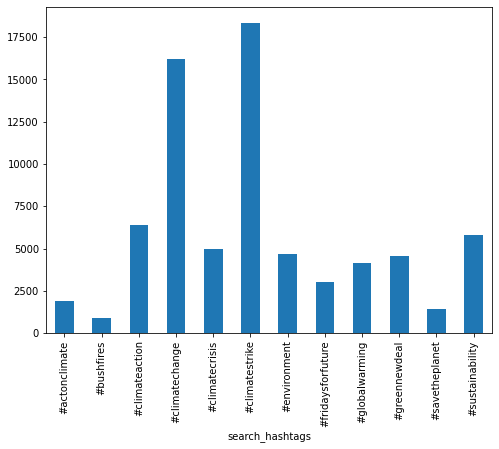

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df2.groupby('search_hashtags').text.count().plot.bar(ylim=0)
plt.show()

In [13]:
# Cantidad de elementos por categoría
df2.groupby('search_hashtags').text.count()

search_hashtags
#actonclimate         1895
#bushfires             899
#climateaction        6378
#climatechange       16190
#climatecrisis        4982
#climatestrike       18355
#environment          4703
#fridaysforfuture     3038
#globalwarming        4152
#greennewdeal         4589
#savetheplanet        1434
#sustainability       5790
Name: text, dtype: int64

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df2.text).toarray()
labels = df2.category_id
features.shape

(72405, 50906)

In [15]:
features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
# Unigramas y Bigramas correlacionados a cada categoria
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for search_hashtags, category_id in sorted(category_to_id2.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names_out())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(search_hashtags))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# '#actonclimate':
  . Most correlated unigrams:
. allarecalled
. actonclimate
  . Most correlated bigrams:
. actonclimate climateactionnow
. allarecalled actonclimate
# '#bushfires':
  . Most correlated unigrams:
. smoke
. bushfires
  . Most correlated bigrams:
. bushfires auspol
. auspol bushfires
# '#climateaction':
  . Most correlated unigrams:
. sdgs
. climateaction
  . Most correlated bigrams:
. united nations
. climatechange climateaction
# '#climatechange':
  . Most correlated unigrams:
. climatestrike
. climatechange
  . Most correlated bigrams:
. auspol climatechange
. climatechange real
# '#climatecrisis':
  . Most correlated unigrams:
. climatestrike
. climatecrisis
  . Most correlated bigrams:
. climateemergency climatecrisis
. climatechange climatecrisis
# '#climatestrike':
  . Most correlated unigrams:
. climatechange
. climatestrike
  . Most correlated bigrams:
. city hall
. today climatestrike
# '#environment':
  . Most correlated unigrams:
. birchfabrics
. environment

In [17]:
# Naive Bayes Classifier
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import MultinomialNB

count_vect = CountVectorizer()

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['search_hashtags'], random_state = 0)

In [18]:
X_train.count()

54303

In [19]:
X_test

49115    .@POLITICOEurope debate on #futureofeurope: Do...
53552    Just some encouraging words for our ladies and...
64221    Check out how @louiselassalle sees #Lifedesign...
4141     Half of America led by #RadicalDems are #Chick...
60129    A sneak peek at one of the insights that’s com...
                               ...                        
29788    Day 2 of our promotional campaign for #YouthCl...
32137    Reviewing the #SDG13 = #ClimateAction on a FRI...
67154          We need a #GreenNewDeal now! #ClimateCrisis
29907    @ipinst/@NorwayUN event on #HR and #agenda2030...
38049    #ClimateStrike #ClimateChange TODAY IS THE DAY...
Name: text, Length: 18102, dtype: object

In [20]:
y_train.count()

54303

In [21]:
y_test.count()

18102

In [22]:
#Term Frecuency - TF
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

In [23]:
print(X_train_counts)

  (0, 77918)	1
  (0, 53353)	1
  (0, 38780)	1
  (0, 80538)	1
  (0, 13008)	1
  (0, 45133)	1
  (0, 34779)	1
  (0, 59596)	1
  (0, 40132)	1
  (0, 49329)	1
  (0, 18268)	1
  (0, 18893)	1
  (0, 9212)	1
  (0, 59615)	1
  (0, 20738)	1
  (0, 67329)	1
  (0, 7957)	1
  (0, 14426)	1
  (0, 69535)	1
  (0, 32812)	1
  (0, 20198)	1
  (0, 18817)	1
  (0, 30941)	1
  (0, 52468)	1
  (0, 20366)	1
  :	:
  (54302, 75869)	1
  (54302, 18556)	1
  (54302, 78325)	1
  (54302, 52476)	1
  (54302, 33542)	1
  (54302, 37575)	1
  (54302, 46179)	1
  (54302, 63021)	1
  (54302, 20474)	1
  (54302, 63693)	1
  (54302, 29609)	1
  (54302, 66726)	1
  (54302, 18202)	1
  (54302, 80225)	1
  (54302, 53116)	1
  (54302, 52175)	1
  (54302, 21406)	2
  (54302, 37431)	1
  (54302, 13603)	1
  (54302, 14419)	1
  (54302, 30488)	1
  (54302, 4819)	1
  (54302, 56699)	1
  (54302, 53118)	1
  (54302, 36984)	1


In [24]:
tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [25]:
print(X_train_tfidf)

  (0, 80538)	0.17486569459456727
  (0, 77918)	0.17834065855682216
  (0, 69535)	0.18358318727578357
  (0, 67329)	0.30678662440832644
  (0, 59615)	0.22452284278674334
  (0, 59596)	0.16350228020554292
  (0, 53353)	0.11839226571530885
  (0, 52468)	0.3220120940527195
  (0, 49329)	0.258816344648973
  (0, 45133)	0.33409722919110374
  (0, 40132)	0.07014664841328788
  (0, 38780)	0.08256077657351918
  (0, 34779)	0.23875882370047752
  (0, 32812)	0.07496976086193802
  (0, 30941)	0.16946716324705602
  (0, 20738)	0.2892672839377592
  (0, 20407)	0.12426279548175348
  (0, 20366)	0.09529413315353659
  (0, 20287)	0.06330807350433743
  (0, 20198)	0.08710489284276782
  (0, 18893)	0.2669961024158804
  (0, 18817)	0.10768960397038305
  (0, 18268)	0.22414792450202217
  (0, 14426)	0.22855677430417698
  (0, 13008)	0.09998681860227147
  :	:
  (54302, 53118)	0.24930396792561876
  (54302, 53116)	0.2068267667755867
  (54302, 52476)	0.1246029875609554
  (54302, 52175)	0.2068267667755867
  (54302, 46179)	0.1286193798

In [26]:
y_train.count()

54303

In [27]:
# Modelo Naive Bayes
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [29]:
# Obtener arreglo con predicciones
y_pred = clf.predict(count_vect.transform(X_test))

In [30]:
# Medir la proporción de resultados correctos del clasificador
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.5060766766103193


In [34]:
# Evaluación del modelo
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

                   precision    recall  f1-score   support

    #actonclimate       1.00      0.02      0.05       473
       #bushfires       1.00      0.03      0.05       230
   #climateaction       0.82      0.09      0.16      1582
   #climatechange       0.39      0.84      0.54      4044
   #climatecrisis       0.89      0.06      0.12      1207
   #climatestrike       0.56      0.96      0.70      4566
     #environment       0.76      0.19      0.30      1208
#fridaysforfuture       0.93      0.08      0.15       765
   #globalwarming       0.86      0.16      0.27      1050
    #greennewdeal       0.98      0.16      0.27      1152
   #savetheplanet       0.96      0.07      0.14       351
  #sustainability       0.90      0.32      0.48      1474

         accuracy                           0.51     18102
        macro avg       0.84      0.25      0.27     18102
     weighted avg       0.69      0.51      0.42     18102



In [31]:
print(clf)

MultinomialNB()


In [32]:
print(clf.predict(count_vect.transform(["A year of resistance, as youth protests shaped climate change discussions HOW ACTIVE WILL THIS YOUTH VOTE BE IN 2020"])))

['#climatestrike']


In [33]:
print(clf.predict(count_vect.transform(["My oldest daughter finding inspiration and encouragement about the future by reading up on TIMES, Person of the Year, Greta Thunberg #climatestrike #letthekidsunite #futureleaders"])))

['#climatestrike']
